# Simple Linear Regression

Regression loss functions establish a linear relationship between a dependent variable (Y) and one independent variable (X). So we are trying to fit the best line in space on these variables.

These are best utilized when you have numerical/continous data, in this project we will be using the popular iris dataset.

#### Loss Functions
##### Mean Squared Error Loss

MSE measures the average squared difference between the actual and predicted values by the model. The output is a single number associated with a set of values. 
Consider the slope intercept linear equation, $\hat{y} = mx+b$. 

We derive MSE as:

$ \frac{1}{N}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2} $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('iris_data.csv')

In [6]:
#Gradient descent algorithm for linear regression
from numpy import *

# sum of squared errors
def error(b, m, points):
    N = float(len(points))
    error = 0
    for i in range (0, len(points)):
        x = points.iat[i, 0] #sepal length
        y = points.iat[i, 1] #sepal width
        error += (y-(m*x + b)) ** 2
    return error/N

#Gradient Decent
def gradient(b_test, m_test, points, alpha):
    b_grad = 0
    m_grad = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points.iat[i, 0] #sepal length
        y = points.iat[i, 1] #sepal width
        b_grad += -(2/N) * (y - (m_test * x + b_test))
        m_grad += -(2/N) * x * (y - (m_test * x + b_test))
    new_b = b_test - (alpha * b_grad)
    new_m = m_test - (alpha * m_grad)
    return [new_b, new_m]

def gradient_descent(points, start_b, start_m, alpha, num):
    b = start_b
    m = start_m
    for i in range(num):
        b,m = gradient(b, m, points, alpha)
    return [b,m]


points = data[['Sepal Length','Sepal Width']]
alpha = 0.0001 #learning rate

#y=mx+b
start_b = 0 # initial y-intercept
start_m = 0 # initial slope
num = 8000 #number of iterations
    
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(start_b, start_m, error(start_b, start_m, points)))

[b, m] = gradient_descent(points, start_b, start_m, alpha, num)

print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num, b, m, error(b, m, points)))


Starting gradient descent at b = 0, m = 0, error = 9.51366666666666
After 8000 iterations b = 0.18261305240425263, m = 0.4809585651681152, error = 0.3855490768966183


In [3]:
b

0.15812567032479438

In [4]:
m

0.48506950255568454

<Figure size 432x288 with 0 Axes>

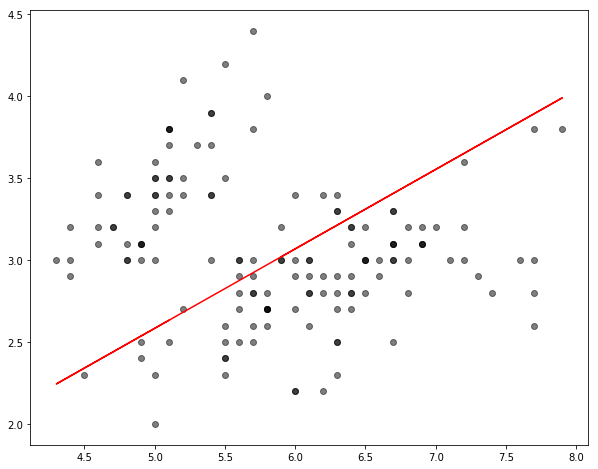

In [5]:
# Scatter Plot
x = points['Sepal Length']
y = points['Sepal Width']
y_hat = m*x+b

plt.figure()
plt.figure(figsize =(10, 8)) 
plt.scatter(x, y, color = 'k', alpha=0.5)
plt.plot(x, y_hat,'k-', color = 'r')
plt.show()